In [1]:
import warnings
warnings.filterwarnings('ignore') # :clown:

In [2]:
import numpy as np
import pandas as pd

In [3]:
from glob import glob
import matplotlib.pyplot as plt

In [4]:
files = glob('../data/ecg_preprocessed/*.csv')

In [5]:
hz = 1000

## Wavelet Transform
See https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/ for more information

In [6]:
import pywt

In [7]:
df = pd.read_csv(files[0])
df.head()

,timestamp,signal,signal_normalised,subject_id,category,code,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,...,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,2017-12-15 10:16:06+00:00,-0.000073,0.493088,30100,NaN,NaN,-0.000073,-0.000095,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,2017-12-15 10:16:06.001000+00:00,-0.000083,0.492200,30100,NaN,NaN,-0.000083,-0.000097,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,2017-12-15 10:16:06.002000+00:00,-0.000095,0.491090,30100,NaN,NaN,-0.000095,-0.000100,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,2017-12-15 10:16:06.003000+00:00,-0.000103,0.490368,30100,NaN,NaN,-0.000103,-0.000102,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,2017-12-15 10:16:06.004000+00:00,-0.000110,0.489757,30100,NaN,NaN,-0.000110,-0.000105,64.763176,0.998214,...,0,0,0,0,0,0,NaN,0.0,NaN,0.0


In [8]:
tasks = df['category'].unique()
tasks

array([nan, 'Lying_supine', 'Standing', 'Sitting', 'TA', 'Recov1',
       'SSST_Sing_countdown', 'Recov2', 'Pasat', 'Recov3', 'Raven',
       'Walking_own_pace', 'Walking_fast_pace', 'Cycling',
       'stairs_up_and_down', 'Recov_standing', 'Dishes', 'Vacuum',
       'Recov4', 'TA_repeat', 'Recov5', 'Pasat_repeat', 'Treadmill1',
       'Treadmill2', 'Treadmill3', 'Treadmill4', 'Recov6'], dtype=object)

In [9]:
# import waipy

In [10]:
# for category in df['category'].unique():
#     participant = files[0].split('\\')[-1].split('.')[0]
#     sample = df[df['category'] == category]

#     try:
#         data_norm = waipy.normalize(sample['signal'])

#         alpha = np.corrcoef(data_norm[0:-1], data_norm[1:])[0,1]
#         result = waipy.cwt(data_norm, 1, 1, 0.25, 2, 4/0.25, alpha, 6, mother='Morlet', name='x')

#         waipy.wavelet_plot(f'Stress-in-Action {participant}_{category}', np.arange(0, len(sample)), data_norm, 0.03125, result); 
#     except:
#         print(f'Error in {participant}_{category}')
#         continue

In [11]:
import scaleogram as scg

<Axes: title={'center': 'Continuous Wavelet Transform Amplitude Spectrum'}, xlabel='Time/spatial domain', ylabel='Period'>

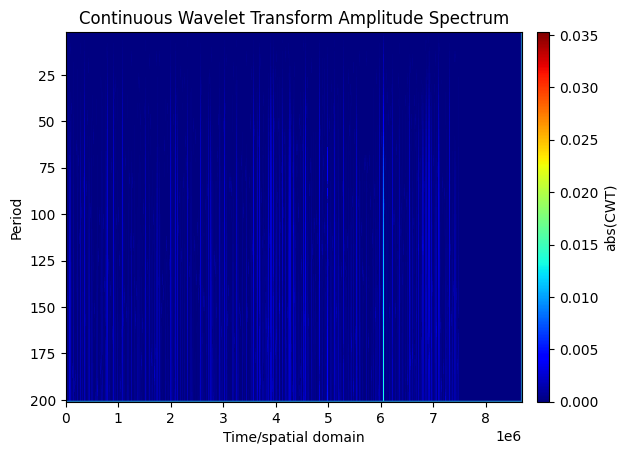

In [12]:
scg.cws(
    df['signal'].to_numpy(), 
    scales=np.arange(1, 101), 
    wavelet='cmor' 
)

### Wider

In [ ]:
Y = df['signal'].to_numpy()

<Axes: title={'center': 'Continuous Wavelet Transform Amplitude Spectrum'}, xlabel='Time/spatial domain', ylabel='Period'>

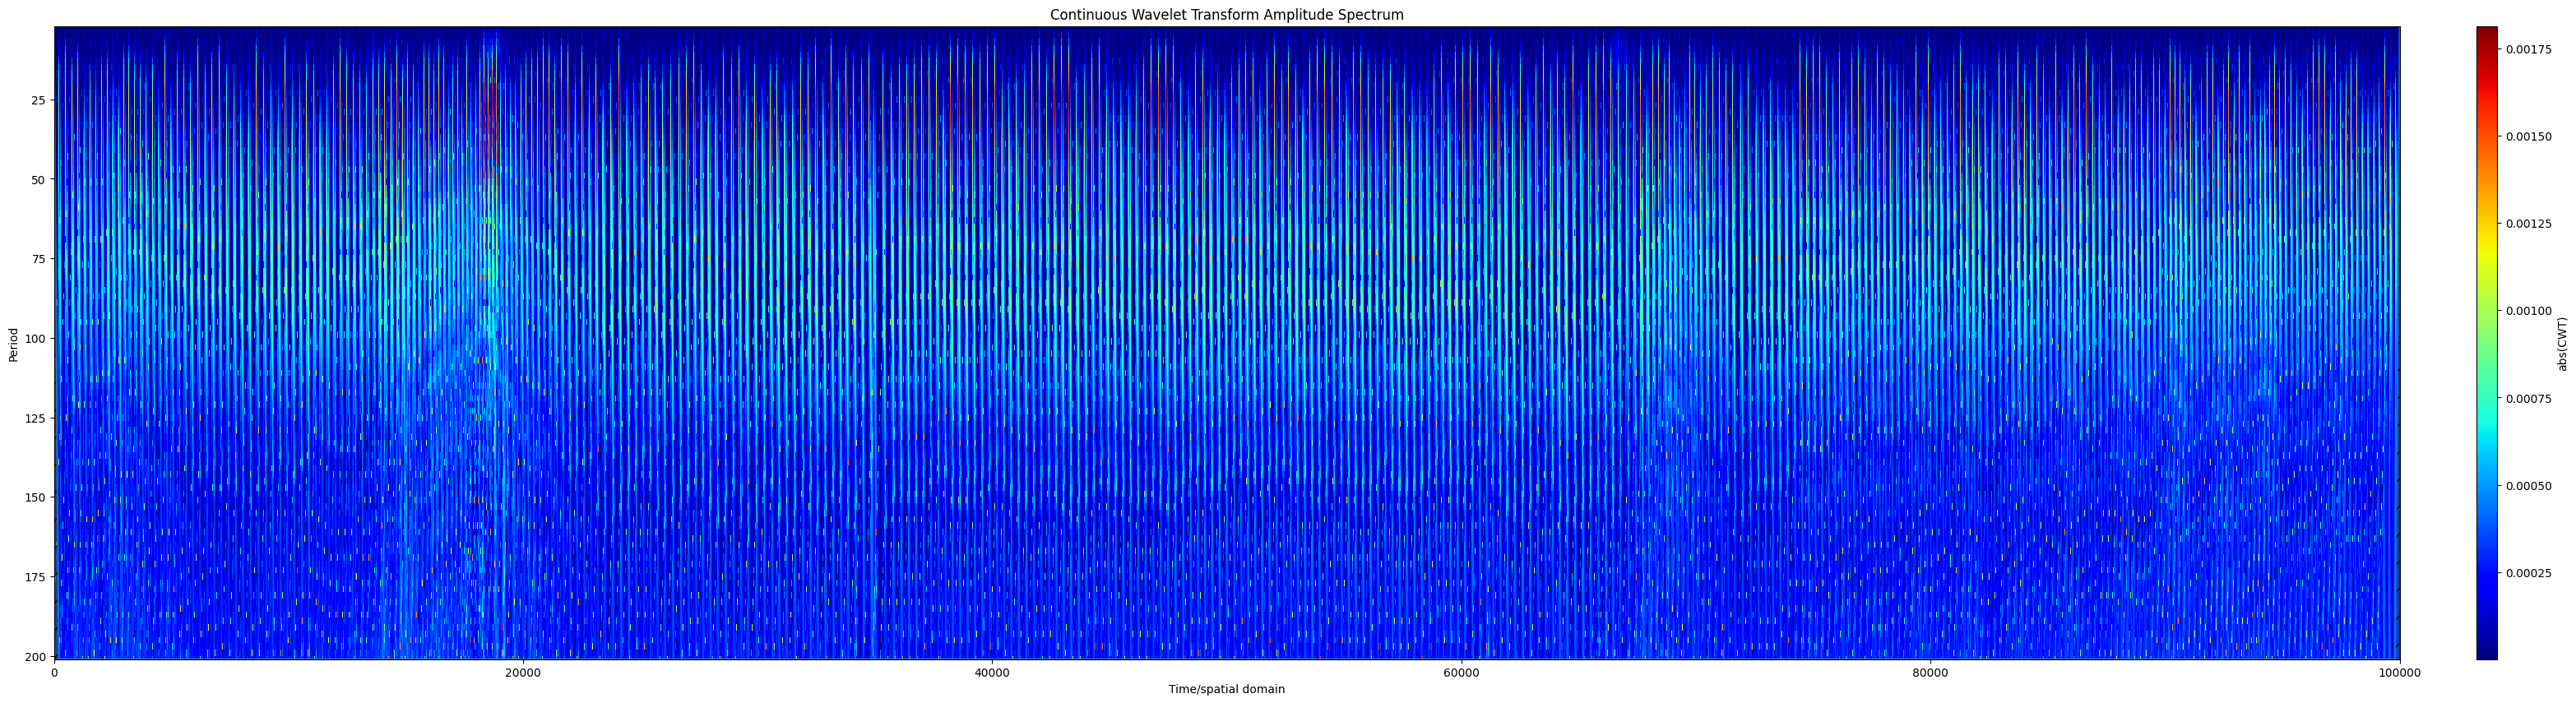

In [28]:
scg.cws(
    Y[:1000 * 100], 
    scales=np.arange(1, 101), 
    wavelet='cmor',
    figsize=(40, 10)
)

## Downsampling

In [13]:
import scipy

In [16]:
secs = len(df)/1000.0 # Number of seconds in signal X (1000 Hz)
samps = int(secs*500) # Number of samples to downsample (500 Hz)
Y = scipy.signal.resample(df['signal'], samps)

<Axes: title={'center': 'Continuous Wavelet Transform Amplitude Spectrum'}, xlabel='Time/spatial domain', ylabel='Period'>

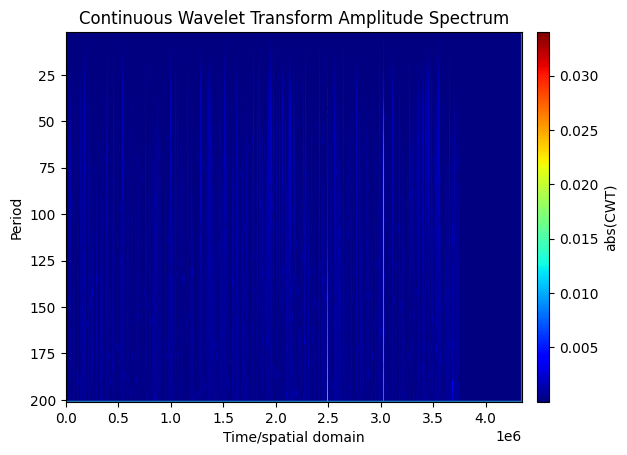

In [20]:
scg.cws(
    Y, 
    scales=np.arange(1, 101), 
    wavelet='cmor' 
)

In [21]:
secs = len(df)/1000.0 # Number of seconds in signal X (1000hz)
samps = int(secs*250) # Number of samples to downsample (250hz)
Y = scipy.signal.resample(df['signal'], samps)

<Axes: title={'center': 'Continuous Wavelet Transform Amplitude Spectrum'}, xlabel='Time/spatial domain', ylabel='Period'>

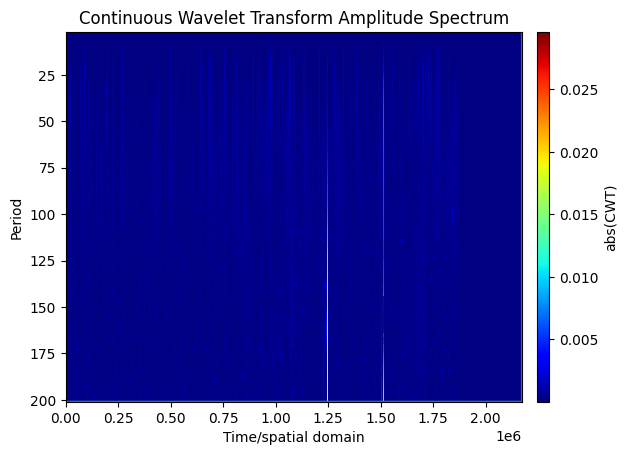

In [22]:
scg.cws(
    Y, 
    scales=np.arange(1, 101), 
    wavelet='cmor' 
)

In [12]:
from matplotlib.gridspec import GridSpec

In [13]:
fig, axs = plt.subplots(int(len(df['category'].unique())/2), 2, figsize=(20,50))

for category, ax in zip(df['category'].unique()[1:], axs.reshape(-1)):
    participant = files[0].split('\\')[-1].split('.')[0]
    sample = df[df['category'] == category]

    if (len(sample) > 0):
        # spec = GridSpec(ncols=6, nrows=6)

        # top_ax = fig.add_subplot(spec[0, 0:5])
        # bottom_left_ax = fig.add_subplot(spec[1:, 0:5])
        # bottom_right_ax = fig.add_subplot(spec[1:, 5])

        scg.cws(
            sample['signal'].to_numpy(), 
            scales=np.arange(1, 150),
            wavelet='cmor0.7-1.5',
            cmap='jet',
            ylabel="Period [milliseconds]", 
            xlabel="Time [milliseconds]",
            ax=ax,
            title=f'{category}',
        )

fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('Scaleogram_Scale_Secs.png')

## Took too long to run, image is still saved.

Error in callback <function flush_figures at 0x0000015D8E2C5BC0> (for post_execute):


KeyboardInterrupt: 

## Wavelet Transform Signal

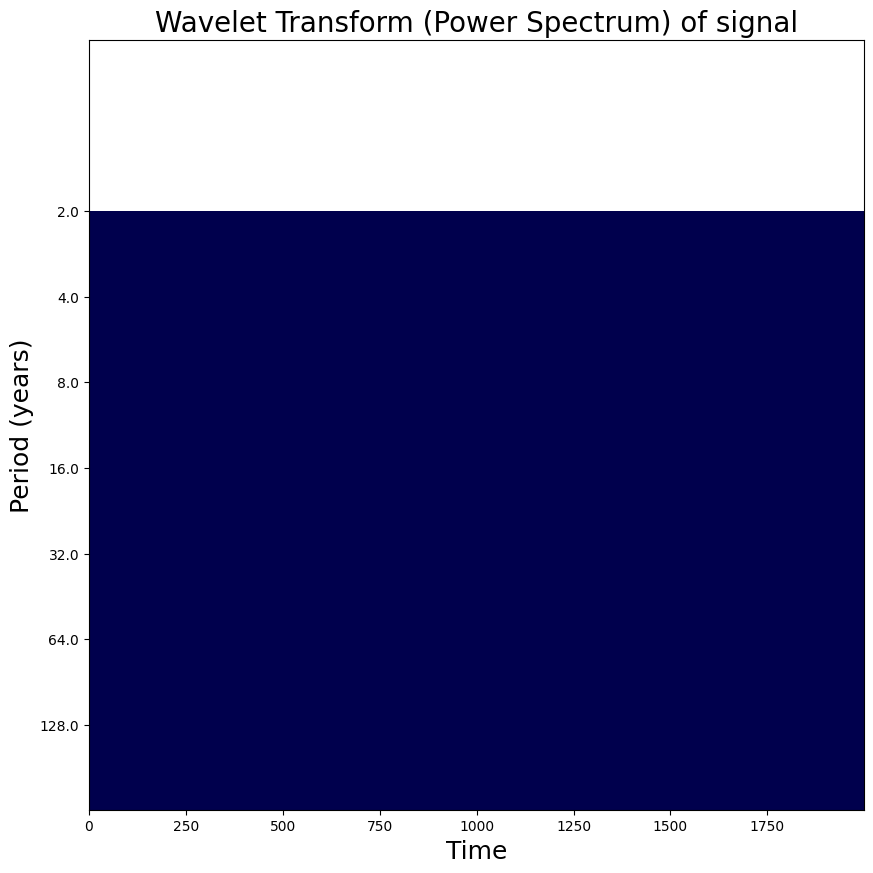

In [31]:

def plot_wavelet(ax, time, signal, scales, waveletname = 'cmor', 
                 cmap = plt.cm.seismic, title = '', ylabel = '', xlabel = ''):
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    return yticks, ylim

scales = np.arange(1, 128)
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (years)'
xlabel = 'Time'

fig, ax = plt.subplots(figsize=(10, 10))
plot_wavelet(ax, np.arange(0, len(Y[:1000 * 2])), Y[:1000 * 2], scales, xlabel=xlabel, ylabel=ylabel, title=title)
plt.show()